In [1]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
import os

Adapted polar map from: https://stackoverflow.com/a/9083017

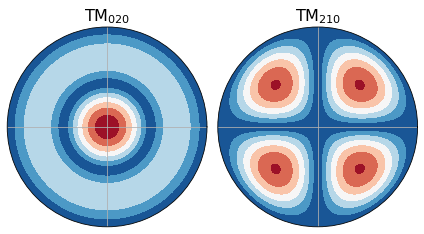

In [2]:
azimuths = np.radians(np.linspace(0, 360, 720))
zeniths = np.linspace(0, 1, 500)

r, theta = np.meshgrid(zeniths, azimuths)
values = [abs(sp.jn(0, [rr*sp.jn_zeros(0,2)[-1] for rr in zeniths])) for t in azimuths]

fig, ax = plt.subplots(1,2,subplot_kw=dict(projection='polar'))
ax[0].contourf(theta, r, values, cmap="RdBu_r")

r, theta = np.meshgrid(zeniths, azimuths)
values = [abs(np.sin(2*t)*sp.jn(2, [rr*sp.jn_zeros(2,1)[-1] for rr in zeniths])) for t in azimuths]

ax[1].contourf(theta, r, values, cmap="RdBu_r")

for a in ax:
    a.tick_params(labelbottom=False, labeltop=False, labelleft=False, labelright=False)
    a.set_rgrids([], labels=[])
    a.set_thetagrids([0,90,180,270], labels=[])
ax[0].set_title("TM$_{020}$", fontsize=16)
ax[1].set_title("TM$_{210}$", fontsize=16)
plt.tight_layout()
fig.savefig(os.path.join("..","outputs","bessel.pdf"), dpi=300, format="pdf", pad_inches=0.1, bbox_inches="tight")
plt.show()